In [2]:
import scanpy as sc
import scvelo as scv

In [3]:
# 1. Set the drawing style (to make the drawing look better)
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization
# scv.set_figure_params('scvelo', dpi=300, fontsize=10) # High-resolution images for the paper

In [4]:
# 2. Download Mouse hippocampal development dataset and load data
adata = scv.datasets.dentategyrus()

In [5]:
# 3. Preprocess the Data
scv.pp.filter_and_normalize(adata, min_shared_counts=30, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 11019 genes that are detected 30 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
/var/folders/hc/vh9fj9s97ds8lwjpw_6l74p80000gn/T/ipykernel_2674/1814074389.py:3: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/preprocessing/neighbors.py:233: DeprecationWarnin

computing neighbors


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/10 cores)


/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/tools/optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))


  0%|          | 0/2930 [00:00<?, ?cells/s]

    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


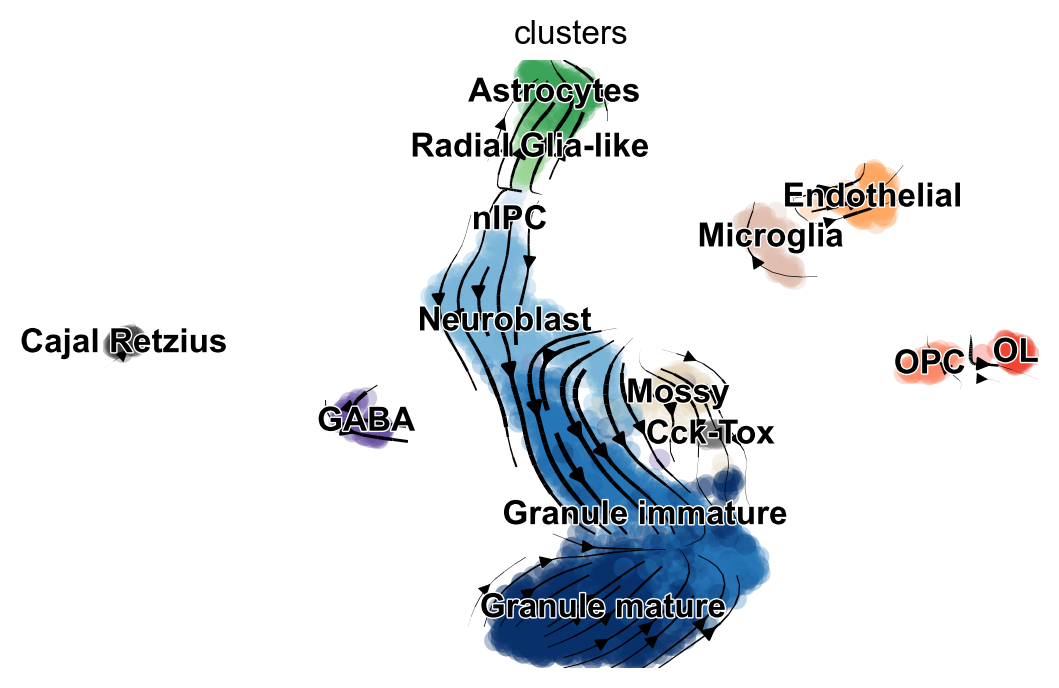

In [6]:
# 4.1 Basic Velocity Estimation
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)
# 4.2 Visualize velocity on Umap
scv.pl.velocity_embedding_stream(adata, basis='umap')

recovering dynamics (using 10/10 cores)


  0%|          | 0/519 [00:00<?, ?gene/s]

    finished (0:00:16) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/10 cores)


  0%|          | 0/2930 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


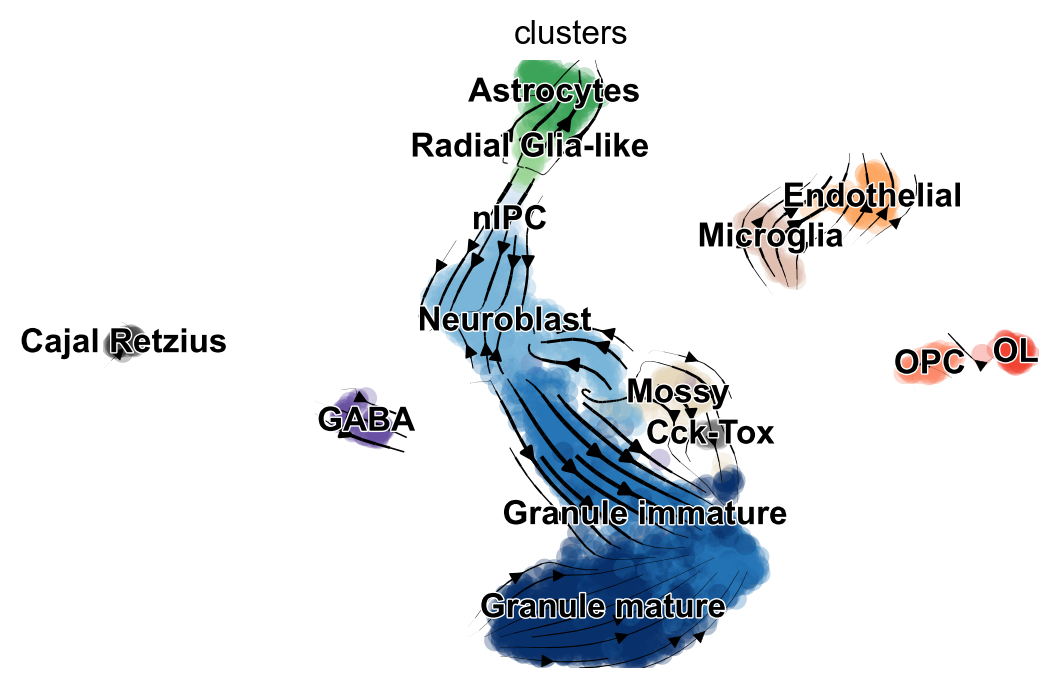

In [7]:
# Differential Kinetics is based on dynamic model.
# 5.1 Inferring complete transcriptional dynamics parameters based on the dynamical modeling
scv.tl.recover_dynamics(adata, n_jobs=-1)

# 5.2 Caluclate the velocity based on dynamics parameters.
scv.tl.velocity(adata, mode='dynamical')

# 5.3 Caluclate cell transition probability
scv.tl.velocity_graph(adata)

# 5.4 Visualize the velocity between clusters on Umap.
scv.pl.velocity_embedding_stream(adata, basis='umap')

In [8]:
# 6.1 Specify whether a gene exhibits different dynamics in different clusters.
var_names = ['Tmsb10', 'Fam155a', 'Hn1', 'Rpl6']
scv.tl.differential_kinetic_test(adata, var_names=var_names, groupby='clusters')

recovering dynamics (using 1/10 cores)


  0%|          | 0/1 [00:00<?, ?gene/s]

    finished (0:00:00) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)

outputs model fit of gene: Rpl6
testing for differential kinetics
    finished (0:00:00) --> added 
    'fit_diff_kinetics', clusters displaying differential kinetics (adata.var)
    'fit_pvals_kinetics', p-values of differential kinetics (adata.var)

outputs model fit of gene: Rpl6


In [9]:
# 6.2 Show the different dynamics
scv.get_df(adata[:, var_names], ['fit_diff_kinetics', 'fit_pval_kinetics'], precision=2)

/var/folders/hc/vh9fj9s97ds8lwjpw_6l74p80000gn/T/ipykernel_2674/1842299870.py:2: DeprecationWarning: `get_df` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please `AnnData::get_df` or Scanpy's `scanpy.get.obs_df` or `scanpy.get.var_df`.
  scv.get_df(adata[:, var_names], ['fit_diff_kinetics', 'fit_pval_kinetics'], precision=2)


fit_diff_kinetics  fit_pval_kinetics
index                                       
Tmsb10        Endothelial           8.49e-13
Fam155a     Cajal Retzius          8.09e-161
Hn1             Microglia           3.26e-03
Rpl6            Microglia           1.41e-16

/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/U

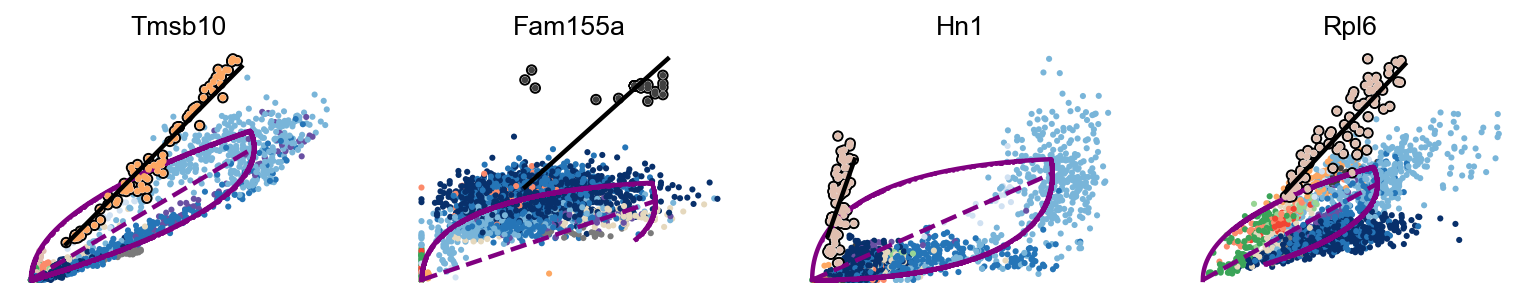

In [10]:
# 6.3 Phase portrait shows the different dynamics bewtween cluster.
kwargs = dict(linewidth=2, add_linfit=True, frameon=False)
scv.pl.scatter(adata, basis=var_names, add_outline='fit_diff_kinetics', **kwargs)

/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


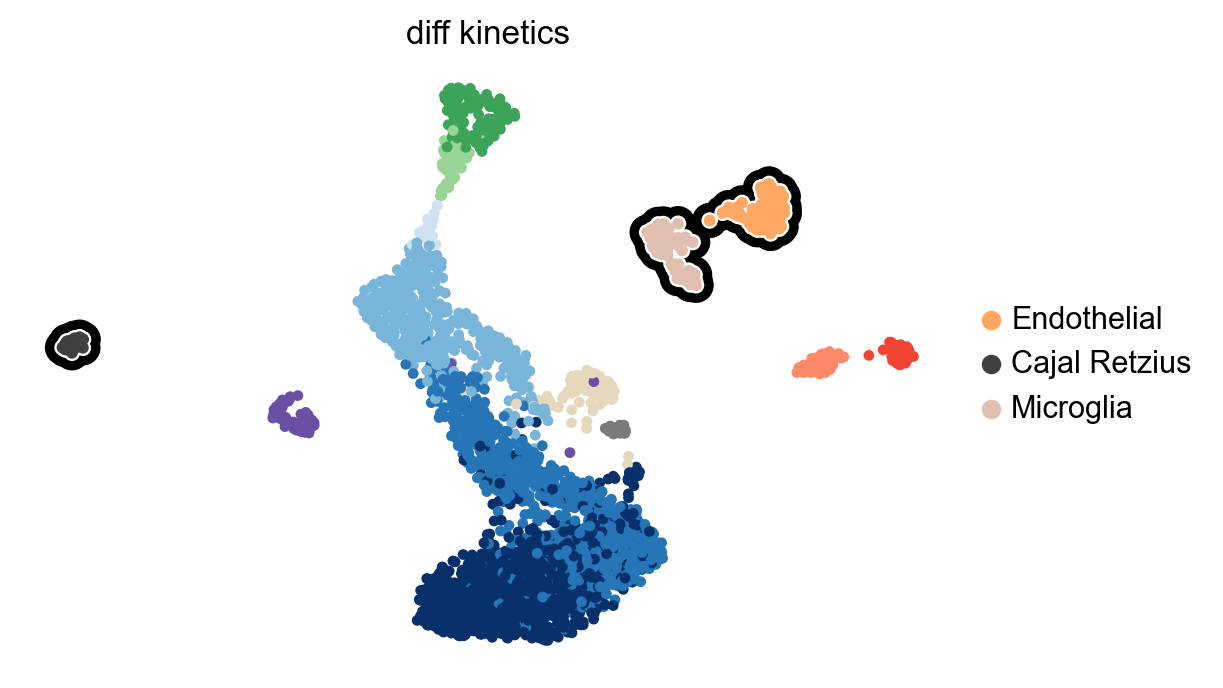

In [11]:
# 6.4 Visulaize clusters with different dynamics on Umap.
diff_clusters=list(adata[:, var_names].var['fit_diff_kinetics'])
scv.pl.scatter(adata, legend_loc='right', size=60, title='diff kinetics',
               add_outline=diff_clusters, outline_width=(.8, .2))

In [12]:
# 7.1 Wether top-likelihood genes show  dymanics difference
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:100]
scv.tl.differential_kinetic_test(adata, var_names=top_genes, groupby='clusters')

testing for differential kinetics
    finished (0:00:08) --> added 
    'fit_diff_kinetics', clusters displaying differential kinetics (adata.var)
    'fit_pvals_kinetics', p-values of differential kinetics (adata.var)


/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/U

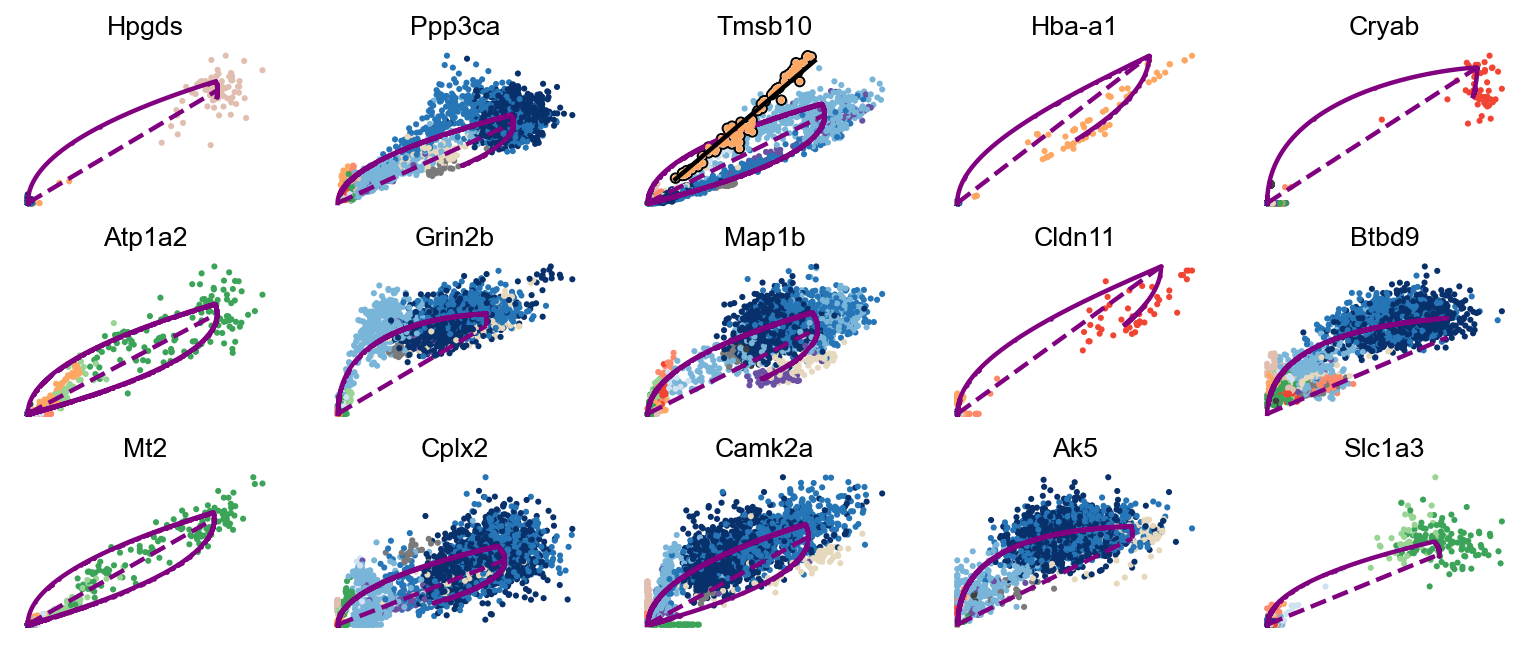

In [13]:
# 7.2 Phase portrait shows the dymanics difference of top 15 genes
scv.pl.scatter(adata, basis=top_genes[:15], ncols=5, add_outline='fit_diff_kinetics', **kwargs)

/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/U

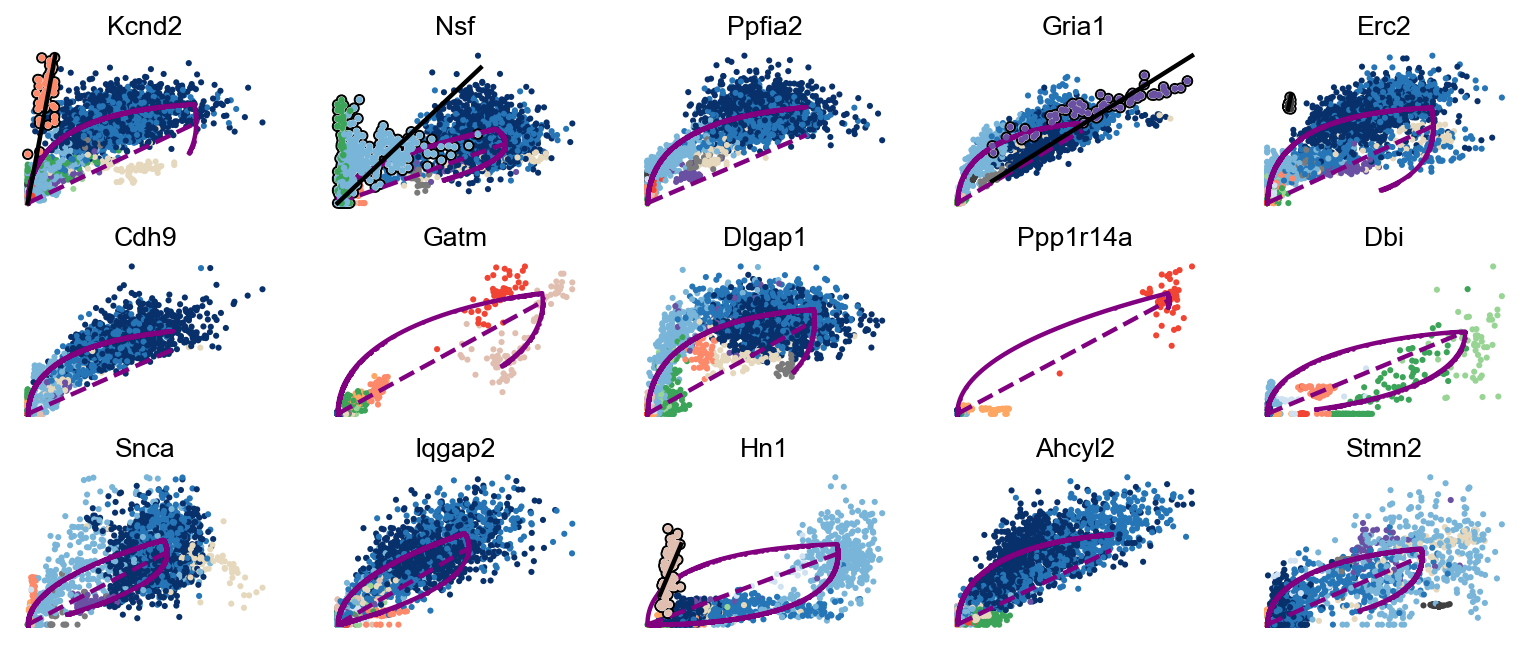

In [14]:
# 7.3 Phase portrait shows the dymanics difference of top 16-30 genes
scv.pl.scatter(adata, basis=top_genes[15:30], ncols=5, add_outline='fit_diff_kinetics', **kwargs)

computing velocities


/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/tools/optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))


    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/10 cores)


  0%|          | 0/2930 [00:00<?, ?cells/s]

    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


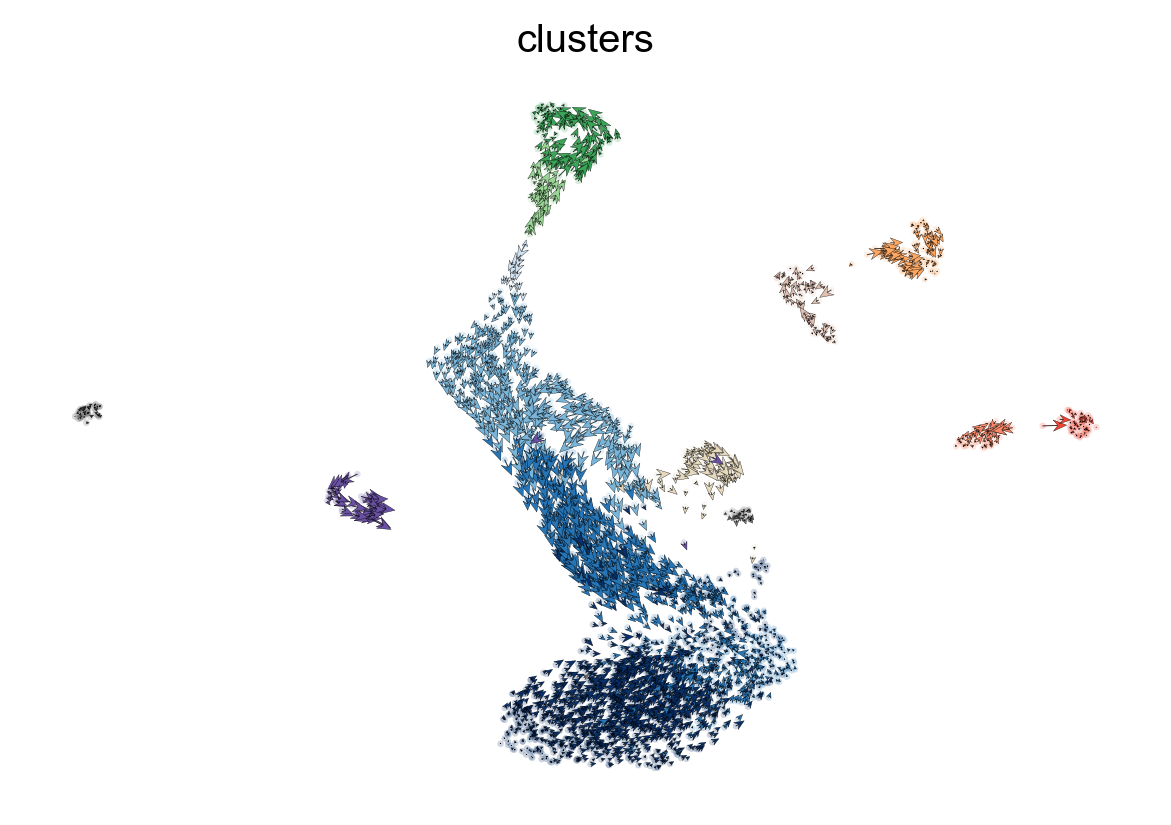

/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


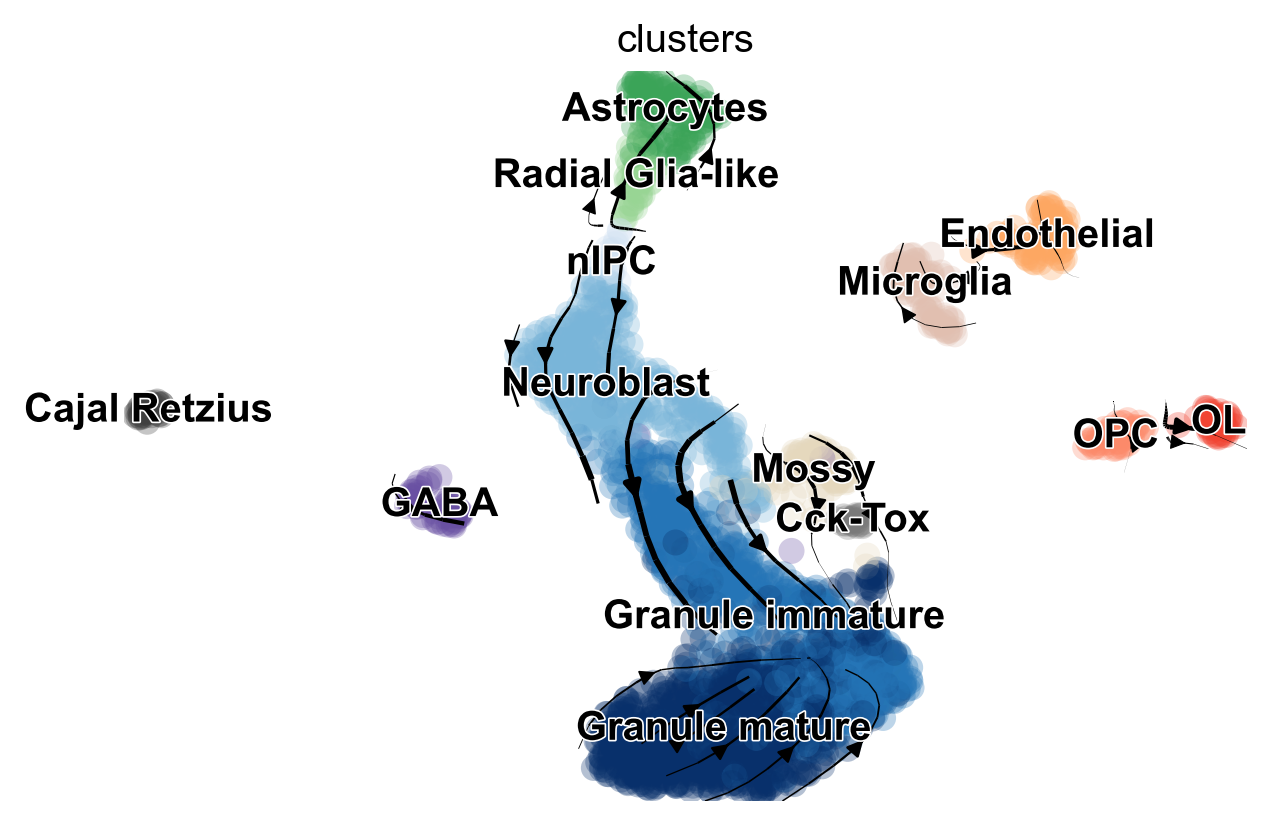

In [23]:
# 8.1 Recompute velocities， take dynamics differences into consideration.
scv.tl.velocity(adata, diff_kinetics=True)

# 8.2 Campurate cell transition probability
scv.tl.velocity_graph(adata)

# 8.3 Visualize the velocity between clusters on Umap.
scv.pl.velocity_embedding(adata, dpi=120, arrow_size=2, arrow_length=2)
scv.pl.velocity_embedding_stream(adata, dpi=120, density=1, smooth=0.5)

/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


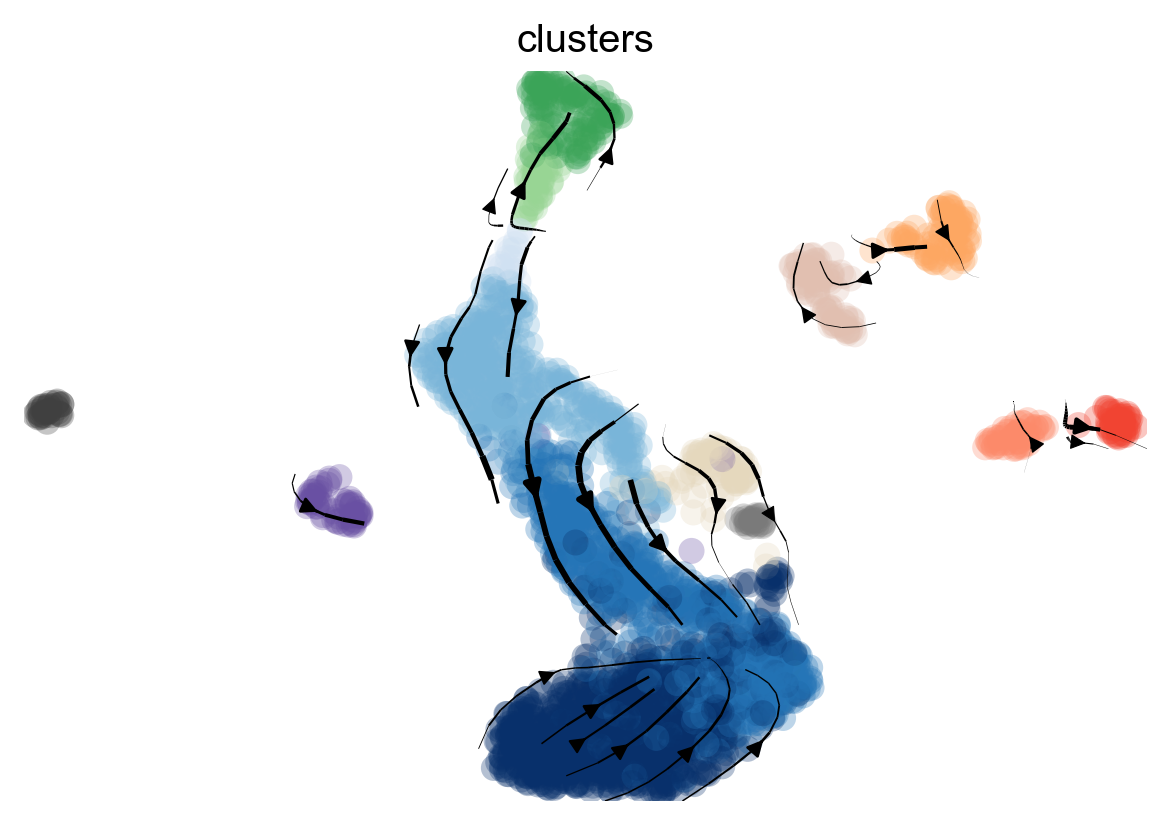

In [20]:
# 8.4
scv.pl.velocity_embedding_stream(adata, 
                                 dpi=120, 
                                 density=1, 
                                 smooth=0.5, 
                                 legend_loc='none') # 关键参数：设置为 'none' 隐藏所有标签

computing terminal states
    identified 4 regions of root cells and 4 regions of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


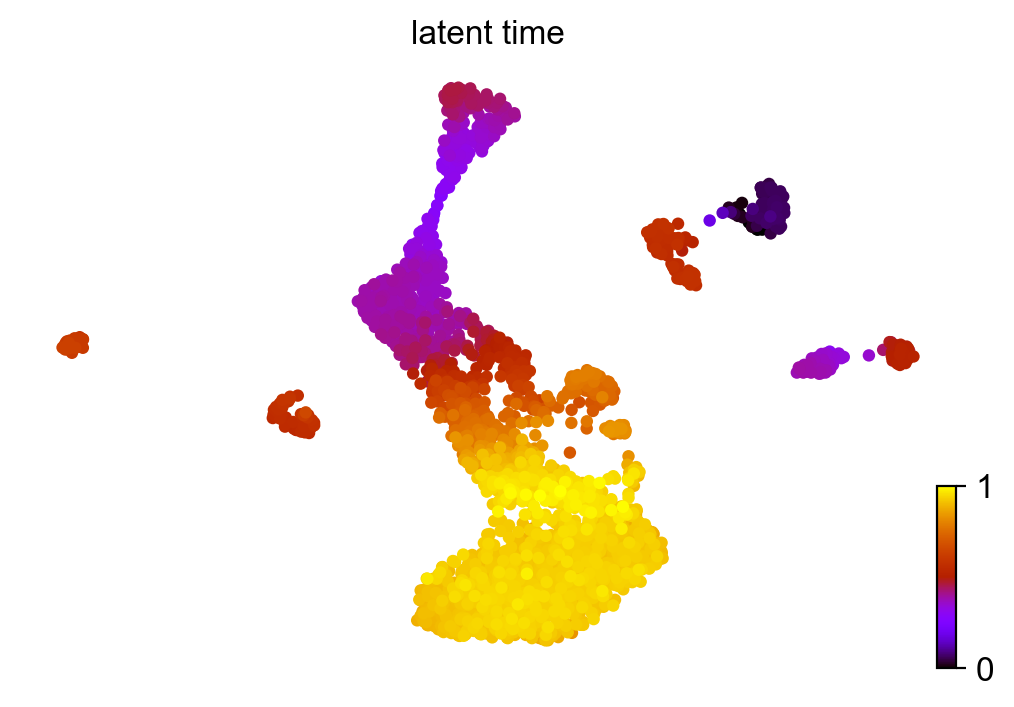

In [24]:
# 9. Latent Time
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=80)

/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/U

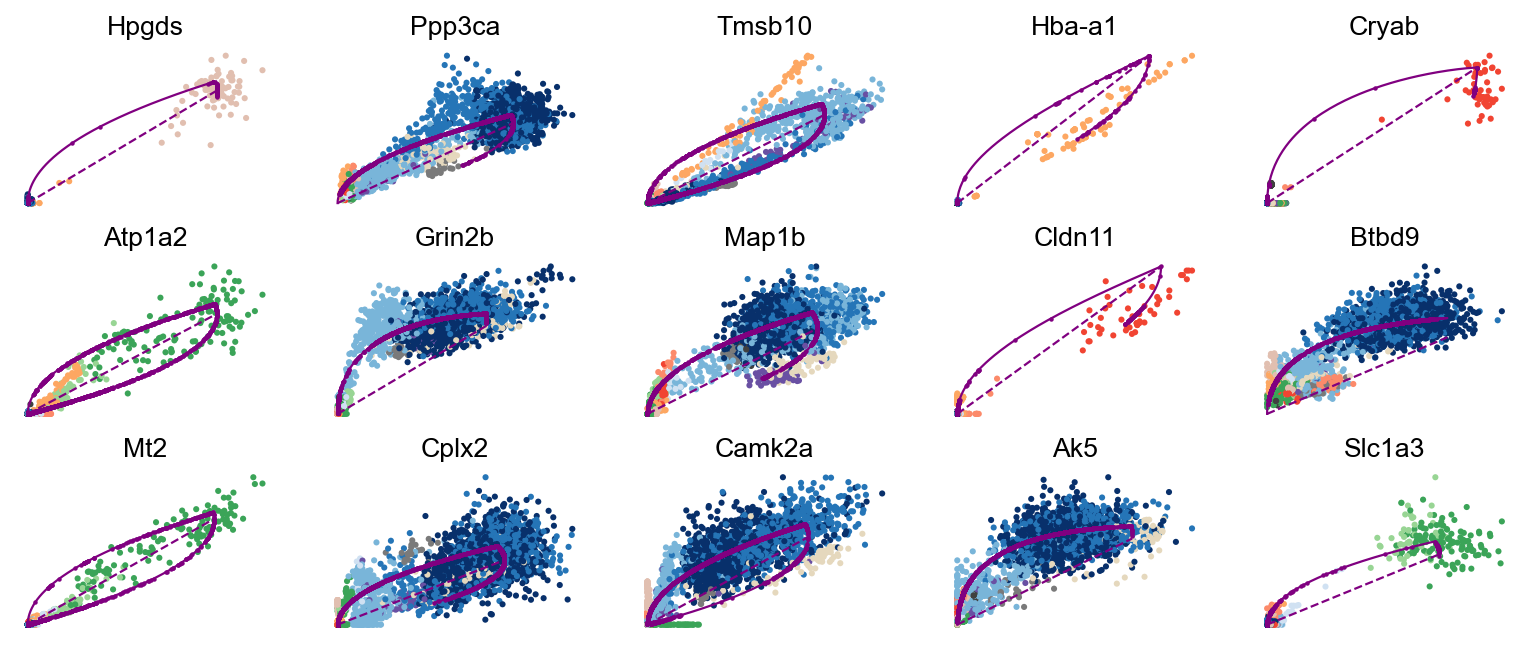

In [28]:
# 10. Driver Genes
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index
scv.pl.scatter(adata, basis=top_genes[:15], ncols=5, frameon=False)

In [29]:
# 11. Cluster-specific top-likelihood genes
scv.tl.rank_dynamical_genes(adata, groupby='clusters')

# Visualize in table
df = scv.get_df(adata, 'rank_dynamical_genes/names')
df.head(5)

ranking genes by cluster-specific likelihoods
    finished (0:00:00) --> added 
    'rank_dynamical_genes', sorted scores by group ids (adata.uns)


/var/folders/hc/vh9fj9s97ds8lwjpw_6l74p80000gn/T/ipykernel_2674/2607870670.py:5: DeprecationWarning: `get_df` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please `AnnData::get_df` or Scanpy's `scanpy.get.obs_df` or `scanpy.get.var_df`.
  df = scv.get_df(adata, 'rank_dynamical_genes/names')
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/core/_anndata.py:257: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(data.obs[key])


Astrocytes Cajal Retzius  Cck-Tox Endothelial    GABA Granule immature  \
0     Atp1a2         Gap43   Ppp3ca      Hba-a1     Npy           Ppp3ca   
1        Mt2        Cdkn1c   Dlgap1       Crip1  Tmsb10           Grin2b   
2     Slc1a3       Col11a1    Stmn2      Lgals1   Map1b            Map1b   
3    Slco1c1          Rpl6  Rasgrf1    BC028528    Gad2              Nsf   
4       Gja1       Ankrd35    Tshz2        Flt1   Gap43              Ak5   

  Granule mature Microglia   Mossy Neuroblast        OL     OPC  \
0         Ppp3ca     Hpgds   Cplx2     Tmsb10     Cryab   Scrg1   
1           Erc2     Clic1   Map1b      Gria1    Cldn11  Dlgap1   
2          Btbd9      Gatm     Nsf     Ppp3ca     Sept4   Cdc40   
3         Grin2b  Rnaset2b   Gap43      Btbd9  Ppp1r14a   Gria4   
4          Map1b      Lgmn  Ppp3ca      Map1b     Erbb4  Ptprz1   

  Radial Glia-like    nIPC  
0           Atp1a2  Tmsb10  
1             Gfap  Fbxo30  
2           Gm4285    Rpl6  
3             Tcf4  Trim59  
4            Scrg1   Epha4

calculating cell cycle phase
-->     'S_score' and 'G2M_score', scores of cell cycle phases (adata.obs)


/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


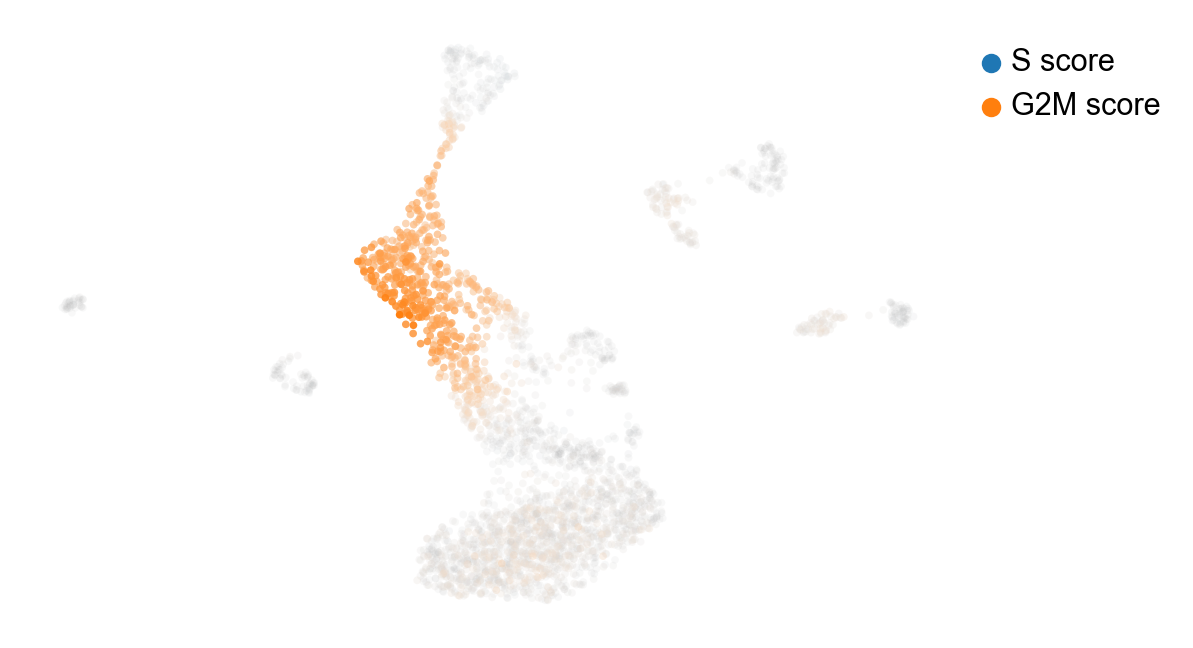

In [30]:
# 12. Calculate cell cycles
scv.tl.score_genes_cell_cycle(adata)
scv.pl.scatter(adata, color_gradients=['S_score', 'G2M_score'], smooth=True, perc=[5, 95])

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


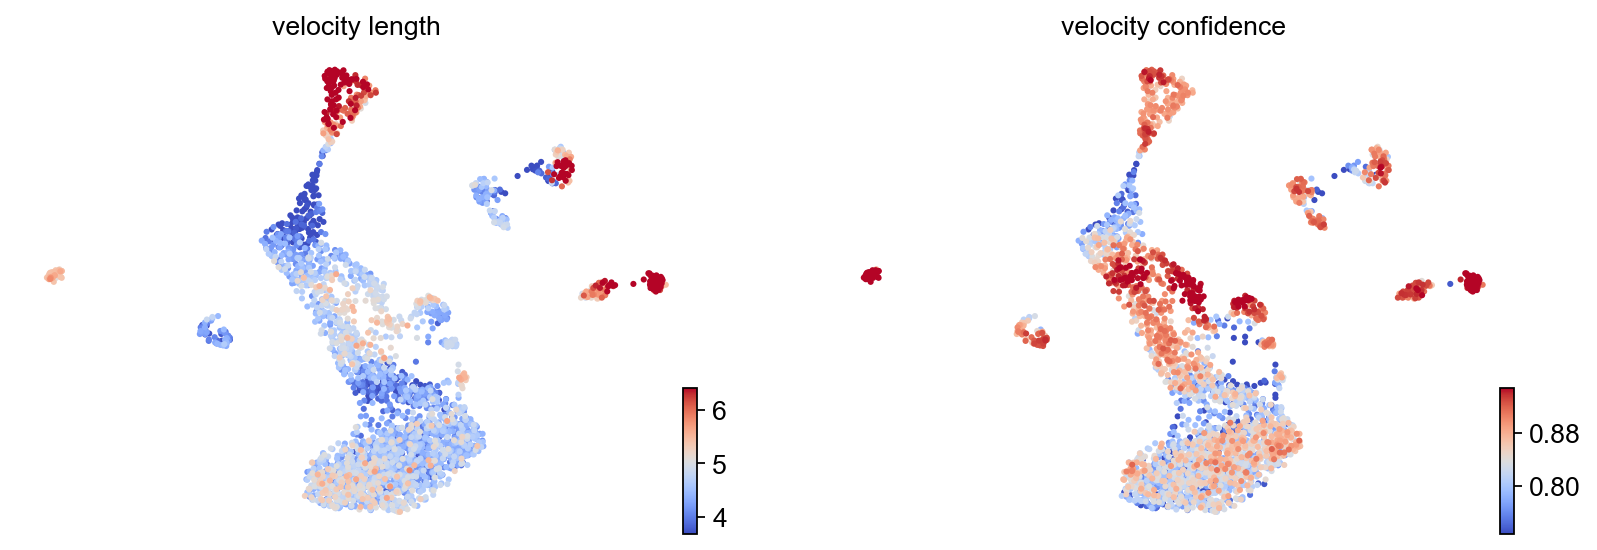

In [31]:
# 13. Velocity_length & Velocity_confidence (cell level)
# Velocity_length (speed of differentiation) : the total length of the RNA velocity vector of all genes in a cell
# Velocity_confidence (confidence of differentiation）：The cosine distance velocity between one cell and its nearest neighbors.

scv.tl.velocity_confidence(adata)

# Visualize Velocity_length and Velocity_confidence on Umap;

keys = ['velocity_length', 'velocity_confidence']
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])

# Visualize Velocity_length and Velocity_confidence on heatmap table;

df = adata.obs.groupby('clusters')[keys].mean().T
df.style.background_gradient(cmap='coolwarm', axis=1)

/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


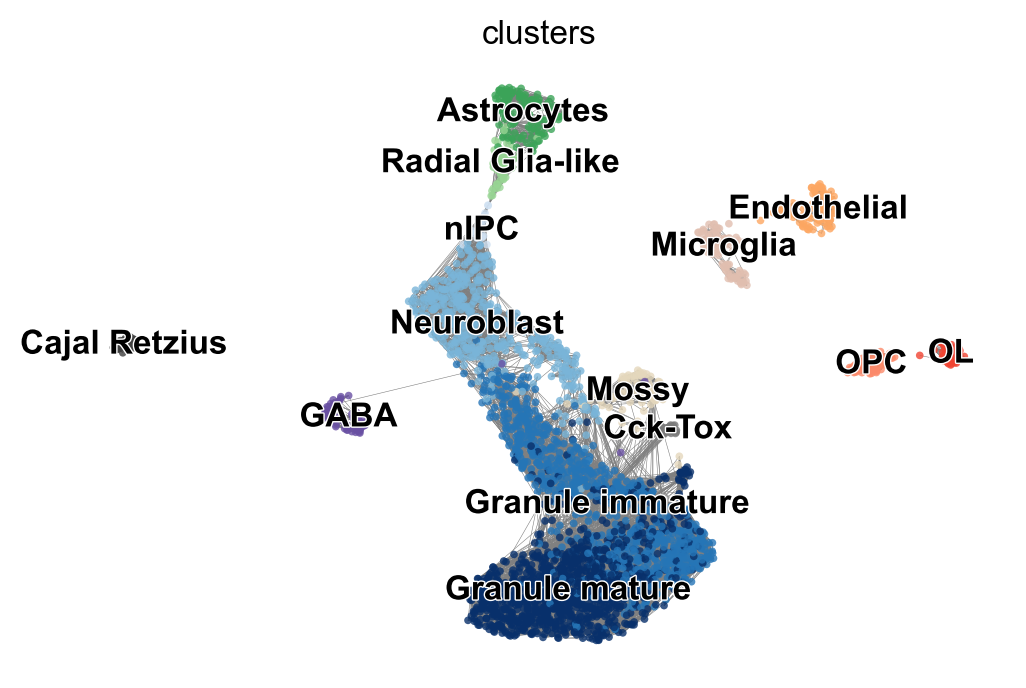

/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


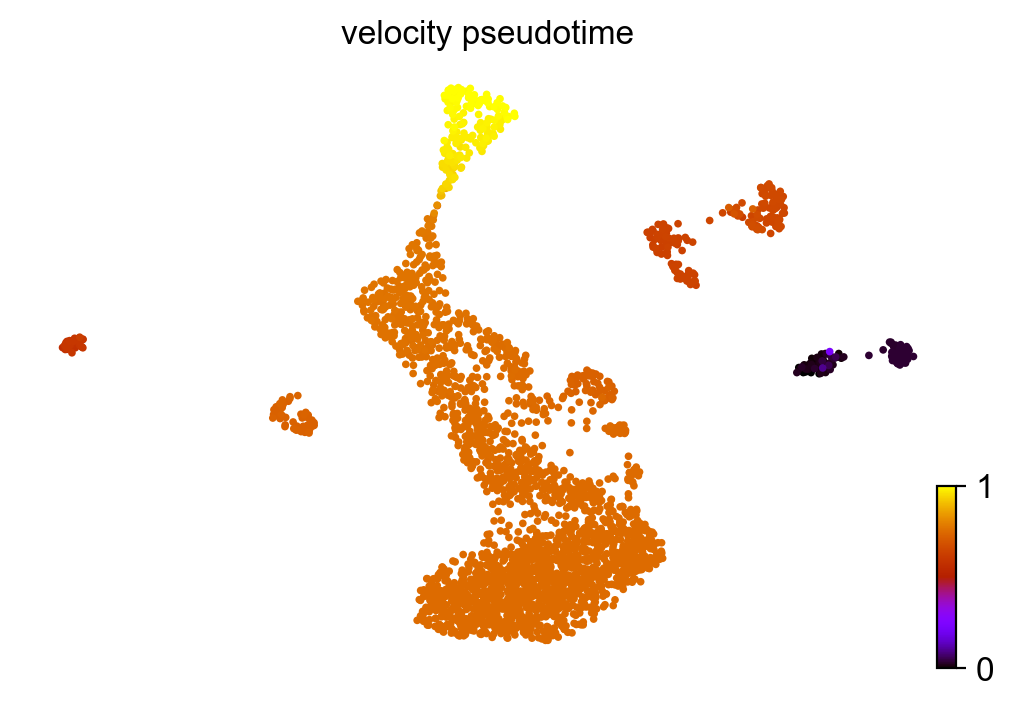

In [32]:
# 14. global trajectories (cell level)
# Using intercellular transitions to construct global developmental trajectories and timelines.

# Viscualize the transitions (cosine Similarity > 0.1)

scv.pl.velocity_graph(adata, threshold=.1)

# Developmental trajectory tracking

# x, y = scv.utils.get_cell_transitions(adata, basis='umap', starting_cell=70)
# ax = scv.pl.velocity_graph(adata, c='lightgrey', edge_width=.05, show=False)
# ax = scv.pl.scatter(adata, x=x, y=y, s=120, c='ascending', cmap='gnuplot', ax=ax)

# Developmental pseudotime

scv.tl.velocity_pseudotime(adata)
scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot')

dict_keys(['distances', 'connectivities'])
running PAGA using priors: ['velocity_pseudotime']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


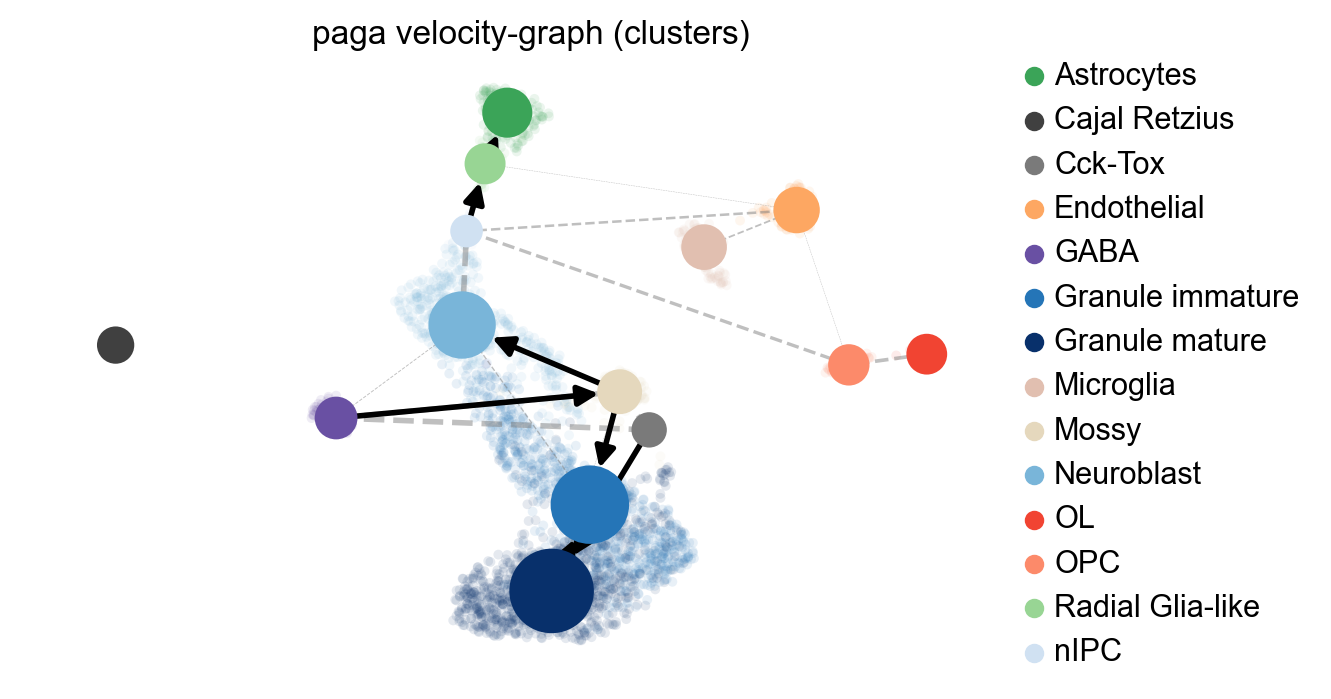

In [33]:
# 15. global trajectories (cluster level)
# Extend PAGA by velocity-inferred directionality.

# Install or upgrade igraph. (PAGA requires to install igraph)，(Note version compatibility).
# !pip install "igraph==0.11.9"

# this is needed due to a current bug - bugfix is coming soon.
adata.uns['neighbors'] = {
    'distances': adata.obsp['distances'], 
    'connectivities': adata.obsp['connectivities']
}
print(adata.uns['neighbors'].keys())

# calculate the direction of cluster
scv.tl.paga(adata, groups='clusters')

# Visulize the direction of cluters on Umap
scv.pl.paga(adata, basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5)